#Nome e RM dos integrantes da DevAll
Caio Henrique de Assis Martins - 93935 <br/>
Carolina Goudromihos Puig - 95078 <br/>
Felipe Miguel Ortega de Souza - 94921 <br/>
Guilherme Costa - 93642 <br/>
Isadora Antunes Lourenço Pereira - 94785 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import adjusted_rand_score, silhouette_score,f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import statistics

# 1. Sensores do robô

## 1.1. Carregamento de dados


Nesse módulo carregamos os dados do documento CSV através da biblioteca Pandas e vizualizamos o preenchimento da tabela, ou seja, quantas informações estavam preenchidas (info) e como estavam (head).

In [6]:
dados_sensor = pd.read_csv('sensor_readings_24.csv', sep=',')

In [7]:
dados_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_1     5442 non-null   float64
 1   sensor_2     5442 non-null   float64
 2   sensor_3     5442 non-null   float64
 3   sensor_4     5442 non-null   float64
 4   sensor_5     5442 non-null   float64
 5   sensor_6     5442 non-null   float64
 6   sensor_7     5442 non-null   float64
 7   sensor_8     5442 non-null   float64
 8   sensor_9     5442 non-null   float64
 9   sensor_10    5442 non-null   float64
 10  sensor_11    5442 non-null   float64
 11  sensor_12    5442 non-null   float64
 12  sensor_13    5442 non-null   float64
 13  sensor_14    5442 non-null   float64
 14  sensor_15    5442 non-null   float64
 15  sensor_16    5442 non-null   float64
 16  sensor_17    5442 non-null   float64
 17  sensor_18    5442 non-null   float64
 18  sensor_19    5442 non-null   float64
 19  sensor

In [8]:
dados_sensor.head(10)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.0,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
5,0.439,0.498,3.626,3.629,5.0,2.918,5.000,2.633,2.334,2.645,...,0.589,0.502,0.493,0.504,0.446,0.431,0.444,0.444,0.430,Slight-Right-Turn
6,0.440,5.000,3.627,3.628,5.0,2.919,3.028,2.346,2.330,2.638,...,0.588,0.501,0.492,0.504,0.451,0.433,0.446,0.444,0.432,Slight-Right-Turn
7,0.444,5.021,3.631,3.634,5.0,2.919,5.000,2.626,2.327,2.638,...,0.595,0.500,0.491,0.503,0.453,0.436,0.448,0.444,0.436,Slight-Right-Turn
8,0.451,5.025,3.635,3.639,5.0,2.920,3.027,2.620,2.323,2.632,...,0.595,0.499,0.491,0.502,0.457,0.440,0.453,0.454,0.442,Sharp-Right-Turn
9,0.458,5.022,3.640,3.644,5.0,2.922,5.000,2.346,2.321,2.628,...,0.590,0.496,0.490,0.498,0.462,0.444,0.458,0.461,0.449,Sharp-Right-Turn


## 1.2. Limpeza de Dados

Para que todas as linhas e colunas da tabela estejam preenchidas, foi necessário eliminar algumas. <br/>
Então eliminamos todas as linhas que tinham alguma informação não preenchida, pois todas as colunas eram necessárias e com a mesma quantidade de linhas preenchidas, logo não era viável deletar nenhuma.

In [9]:
dados_s= dados_sensor.dropna(axis="rows")

In [10]:
dados_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5115 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_1     5115 non-null   float64
 1   sensor_2     5115 non-null   float64
 2   sensor_3     5115 non-null   float64
 3   sensor_4     5115 non-null   float64
 4   sensor_5     5115 non-null   float64
 5   sensor_6     5115 non-null   float64
 6   sensor_7     5115 non-null   float64
 7   sensor_8     5115 non-null   float64
 8   sensor_9     5115 non-null   float64
 9   sensor_10    5115 non-null   float64
 10  sensor_11    5115 non-null   float64
 11  sensor_12    5115 non-null   float64
 12  sensor_13    5115 non-null   float64
 13  sensor_14    5115 non-null   float64
 14  sensor_15    5115 non-null   float64
 15  sensor_16    5115 non-null   float64
 16  sensor_17    5115 non-null   float64
 17  sensor_18    5115 non-null   float64
 18  sensor_19    5115 non-null   float64
 19  sensor

## 1.3. Análise Exploratória

Na etapa de análise exploratória consideramos avaliar os valores preenchidos, os valores numéricos foram observados atravé do comando *describe* e para ver quais eram as funções do robô e a quantidade de vezes que cada função aparecia, usamos o count na coluna 'funcao_robo'

In [11]:
dados_s.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24
count,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,...,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000
mean,1.471519,2.328159,2.490088,2.794286,2.956527,2.885590,3.349699,2.540066,3.123337,2.830110,...,2.214829,1.196320,0.987463,0.907868,1.060515,1.074699,1.016477,1.782219,1.554147,1.569449
std,0.804991,1.409665,1.247182,1.308188,1.340652,1.280586,1.414892,1.111894,1.354993,1.304911,...,1.719329,1.091822,0.936976,0.883791,1.148103,1.138271,0.887569,1.574439,1.292313,1.141331
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.124000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.918500,1.366000,1.536500,1.729000,1.772000,1.782000,1.928500,1.616500,1.800000,1.636500,...,0.861000,0.689000,0.580000,0.529000,0.524000,0.543000,0.568000,0.742000,0.790000,0.881000
50%,1.335000,1.910000,2.067000,2.455000,2.665000,2.676000,3.226000,2.168000,2.802000,2.681000,...,1.333000,0.802000,0.738000,0.684000,0.693000,0.693000,0.765000,1.034000,1.071000,1.287000
75%,1.814000,2.687500,2.744000,4.079500,4.315000,3.825500,5.000000,3.193000,5.000000,3.510000,...,4.793500,1.152000,0.913000,0.837000,0.857500,0.862500,1.006500,2.073500,1.558500,1.651000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
dados_s.funcao_robo.value_counts()

Move-Forward         2077
Sharp-Right-Turn     1963
Slight-Right-Turn     772
Slight-Left-Turn      303
Name: funcao_robo, dtype: int64

## 1.4. Estatísticas básicas

As estatísticas foram realizadas foram a média, desvio padrão e variância dos valores apresentados de cada sensor. Através destas, podemos compreender quais são de certa forma mais importantes por apresnetarem maior variância, desvio padrão, como por exemplo o sensor traseiro e frontal.

In [13]:
x = dados_s.drop(columns = ['funcao_robo'])

In [14]:
#Variancia dos sensores
np.var(x)

sensor_1     0.647883
sensor_2     1.986766
sensor_3     1.555158
sensor_4     1.711020
sensor_5     1.796997
sensor_6     1.639580
sensor_7     2.001529
sensor_8     1.236066
sensor_9     1.835647
sensor_10    1.702459
sensor_11    1.903577
sensor_12    1.556904
sensor_13    1.983590
sensor_14    2.503807
sensor_15    2.955515
sensor_16    1.191843
sensor_17    0.877752
sensor_18    0.780934
sensor_19    1.317884
sensor_20    1.295409
sensor_21    0.787624
sensor_22    2.478372
sensor_23    1.669747
sensor_24    1.302382
dtype: float64

In [15]:
#Desvio Padrao dos sensores
np.std(x)

sensor_1     0.804912
sensor_2     1.409527
sensor_3     1.247060
sensor_4     1.308060
sensor_5     1.340521
sensor_6     1.280461
sensor_7     1.414754
sensor_8     1.111785
sensor_9     1.354861
sensor_10    1.304783
sensor_11    1.379702
sensor_12    1.247760
sensor_13    1.408400
sensor_14    1.582342
sensor_15    1.719161
sensor_16    1.091715
sensor_17    0.936884
sensor_18    0.883705
sensor_19    1.147991
sensor_20    1.138160
sensor_21    0.887482
sensor_22    1.574285
sensor_23    1.292187
sensor_24    1.141220
dtype: float64

In [16]:
#media de valores dos sensores

for i in range(1,25):
  m=np.mean(x[f'sensor_{i}'])
  print(f'Sensor_{i}:', (f'{m:.3f}'))

Sensor_1: 1.472
Sensor_2: 2.328
Sensor_3: 2.490
Sensor_4: 2.794
Sensor_5: 2.957
Sensor_6: 2.886
Sensor_7: 3.350
Sensor_8: 2.540
Sensor_9: 3.123
Sensor_10: 2.830
Sensor_11: 2.549
Sensor_12: 2.076
Sensor_13: 2.129
Sensor_14: 2.200
Sensor_15: 2.215
Sensor_16: 1.196
Sensor_17: 0.987
Sensor_18: 0.908
Sensor_19: 1.061
Sensor_20: 1.075
Sensor_21: 1.016
Sensor_22: 1.782
Sensor_23: 1.554
Sensor_24: 1.569


## 1.5. Gráficos

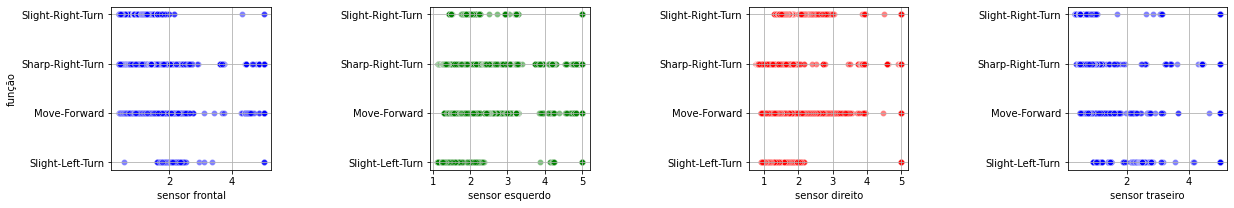

In [17]:
fig, ax = plt.subplots(1,4, figsize=(20, 3))

# Plot de dispersão (scatter)
sns.scatterplot(ax = ax[0], data = dados_sensor, x = 'sensor_1',   y='funcao_robo', color='b', alpha=0.5)
sns.scatterplot(ax = ax[1], data = dados_sensor, x = 'sensor_7', y='funcao_robo', color='g', alpha=0.5)
sns.scatterplot(ax = ax[2], data = dados_sensor, x = 'sensor_13',  y='funcao_robo', color='r', alpha=0.5)
sns.scatterplot(ax = ax[3], data = dados_sensor, x = 'sensor_19',  y='funcao_robo', color='b', alpha=0.5)
# Aqui estamos explicitamente dando nome aos eixos do gráfico
ax[0].set_xlabel('sensor frontal'), ax[0].set_ylabel('função')
ax[1].set_xlabel('sensor esquerdo'), ax[1].set_ylabel('')
ax[2].set_xlabel('sensor direito'), ax[2].set_ylabel('')
ax[3].set_xlabel('sensor traseiro'), ax[3].set_ylabel('')
# Colocando grid
ax[0].grid(), ax[1].grid(), ax[2].grid(), ax[3].grid()

#ax[1].set_xscale('log')
#ax[2].set_xscale('log')

# Vamos aumentar a separação entre os gráficos
plt.subplots_adjust(wspace = 1.0)

# Aumentando o tamanho da fonte (letra)
plt.rcParams.update({'font.size': 10})

Esse gráfico permite ver que o efeito que cada sensor tem no robô, o sensor frontal, por exemplo, enquanto o sensor direito está altamento acionado, ele segue em frente. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dab7c7c90>,
      dtype=object)

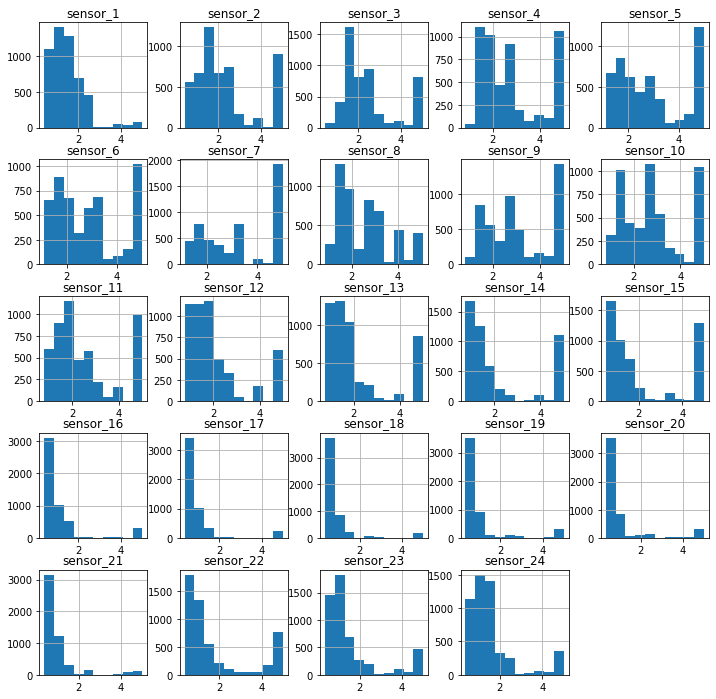

In [18]:

dados_s.hist(figsize=(12,12))

Esse gráfico nos dá uma visão dos sensores mais acionados, por exemplo, o sensor 20 foi pouco acionado pois as colunas estão mais localizados na esquerda do gráfico, enquanto no gráfico do sensor 10, podemos notar que foi mais acionado pois podemos ver uma quantidade relativamente alta de colunas a direita do gráfico quando comparada a do sensor 20. 

## 1.6. Construindo Machine Learning

Para desenvolver nossa ML, começamos separando as colunas de entrada e saída e as de treino e teste, depois escalonamos os dados <br/>
Para estas MLs decidimos fazer o supervisionado de classificação para ambas pois o que precisamos é de entradas numéricas e saídas definidas (strings), logo o mais lógico foi esta opção.
Para isso testamos diversos algoritmos até encontrarmos os que apresetaram melhores resultados, o KNN, Árvore de Decisão e o RandomForest.

In [19]:
x = dados_s.drop(columns = ['funcao_robo'])
y = dados_s['funcao_robo']                

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
# Instanciando o Escalonador
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

                   precision    recall  f1-score   support

     Move-Forward       0.84      0.85      0.85       411
 Sharp-Right-Turn       0.88      0.86      0.87       388
 Slight-Left-Turn       0.80      0.84      0.82        51
Slight-Right-Turn       0.83      0.83      0.83       173

         accuracy                           0.85      1023
        macro avg       0.84      0.85      0.84      1023
     weighted avg       0.85      0.85      0.85      1023



<Figure size 4320x2880 with 0 Axes>

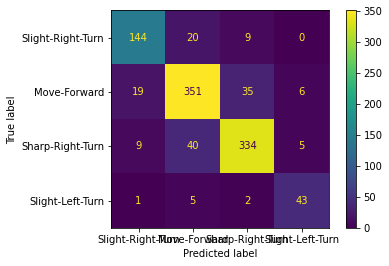

In [21]:
# k-vizinhos mais próximos (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Passo 2 - Treinar o Classificador
knn = KNeighborsClassifier() # Criando classificador (sem nenhum hiperparametro)
knn.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 3 - Testar o Classificador
y_predicoes = knn.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))
accuracy_score(y_true = y_test, y_pred = y_predicoes,) 
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Slight-Right-Turn','Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn'])
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(60, 40))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Slight-Right-Turn','Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn'])
disp.plot(values_format='d') 

                   precision    recall  f1-score   support

     Move-Forward       1.00      1.00      1.00       411
 Sharp-Right-Turn       0.99      0.99      0.99       388
 Slight-Left-Turn       0.98      0.96      0.97        51
Slight-Right-Turn       0.99      0.99      0.99       173

         accuracy                           1.00      1023
        macro avg       0.99      0.99      0.99      1023
     weighted avg       1.00      1.00      1.00      1023



<Figure size 4320x2880 with 0 Axes>

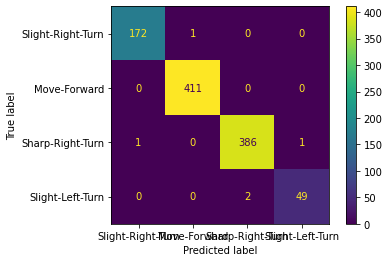

In [22]:
# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# Passo 2 - Treinar o Classificador
dtree = DecisionTreeClassifier() # Criando classificador (sem nenhum hiperparametro)
dtree.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 3 - Testar o Classificador
y_predicoes = dtree.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))
accuracy_score(y_true = y_test, y_pred = y_predicoes,) 
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Slight-Right-Turn','Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn'])
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(60, 40))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Slight-Right-Turn','Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn'])
disp.plot(values_format='d') 


                   precision    recall  f1-score   support

     Move-Forward       1.00      0.99      0.99       411
 Sharp-Right-Turn       0.99      1.00      1.00       388
 Slight-Left-Turn       1.00      0.98      0.99        51
Slight-Right-Turn       0.98      1.00      0.99       173

         accuracy                           0.99      1023
        macro avg       0.99      0.99      0.99      1023
     weighted avg       0.99      0.99      0.99      1023



<Figure size 4320x2880 with 0 Axes>

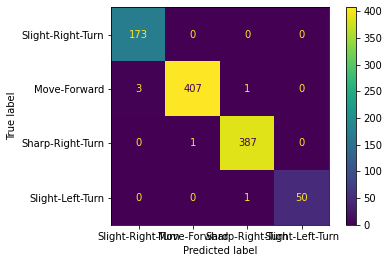

In [23]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

# Passo 2 - Treinar o Classificador
rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
rf.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 3 - Testar o Classificador
y_predicoes = rf.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))
accuracy_score(y_true = y_test, y_pred = y_predicoes,) 
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Slight-Right-Turn','Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn'])
figure = plt.figure(figsize=(60, 40))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Slight-Right-Turn','Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn'])
disp.plot(values_format='d') 

# 2. Velocidade do veículo


## 2.1. Carregamento de dados

Carregamos os dados CSV por meio da biblioteca pandas e observamos o preenchimento da tabela, ou seja, a quantidade de dados preenchidos (info) e o tipo de dados preenchidos (head)

In [34]:
dados_velocidade = pd.read_csv('dataset_velocidade.csv', sep=',')

In [35]:
dados_velocidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78344 entries, 0 to 78343
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no_speed_bump     77565 non-null  float64
 1   acc_x_dashboard   77537 non-null  float64
 2   acc_y_dashboard   77542 non-null  float64
 3   acc_z_dashboard   77564 non-null  float64
 4   gyro_x_dashboard  77544 non-null  float64
 5   gyro_y_dashboard  77567 non-null  float64
 6   gyro_z_dashboard  77537 non-null  float64
 7   temp_dashboard    77581 non-null  float64
 8   speed             77580 non-null  float64
 9   road              78343 non-null  object 
dtypes: float64(9), object(1)
memory usage: 6.0+ MB


In [36]:
dados_velocidade.head()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
0,NaN,-0.029431,-0.019621,9.781015,-0.122070,-0.006327,-0.112208,32.166023,0.010822,paved
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,paved
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,paved
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,paved
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,paved


## 2.2. Limpeza de Dados

A limpeza de dados exclui as linhas que possuiam alguma informação faltante e fez com que todas as linhas e colunas estivessem preenchidas

In [37]:
dados_v= dados_velocidade.dropna(axis="rows")

In [38]:
dados_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71546 entries, 1 to 78342
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no_speed_bump     71546 non-null  float64
 1   acc_x_dashboard   71546 non-null  float64
 2   acc_y_dashboard   71546 non-null  float64
 3   acc_z_dashboard   71546 non-null  float64
 4   gyro_x_dashboard  71546 non-null  float64
 5   gyro_y_dashboard  71546 non-null  float64
 6   gyro_z_dashboard  71546 non-null  float64
 7   temp_dashboard    71546 non-null  float64
 8   speed             71546 non-null  float64
 9   road              71546 non-null  object 
dtypes: float64(9), object(1)
memory usage: 6.0+ MB


Para ser possível realizar o ML, analisamos quais eram os tipos de road que a tabela possuia  e transformamo-no-los em números (para assim ser possível o algoritmos diferencia-los) exibimos um count e transformos cada tipo em um número. 

In [39]:
dados_v.road.value_counts()

unpaved    40333
paved      30507
dirt         410
asphalt      296
Name: road, dtype: int64

In [40]:
dados_v.road

1        paved
2        paved
3        paved
4        paved
5        paved
         ...  
78338    paved
78339    paved
78340    paved
78341    paved
78342    paved
Name: road, Length: 71546, dtype: object

In [41]:
road_map={
    'unpaved':'1',
    'paved':'2',
    'dirt':'3',
    'asphalt':'4',
    'cobblestone':'5'
}   

In [42]:
dados_v['road'] = [road_map[road] for road in dados_v.road]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
dados_v.head()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,2
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,2
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,2
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,2
5,1.0,0.006482,0.011504,9.850446,0.000000,-0.342020,-0.081690,32.357714,0.010822,2


## 2.3. Análise Exploratória

In [44]:
dados_v.describe()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
count,71546.000000,71546.000000,71546.000000,71546.000000,71546.000000,71546.000000,71546.000000,71546.000000,71546.000000
mean,0.978252,0.648422,-0.400170,9.833629,-0.011222,-0.090278,-0.086808,32.859628,7.357883
std,0.145861,1.523081,2.043542,1.682329,3.592949,5.893600,3.355435,0.431986,4.961940
min,0.000000,-7.911143,-13.139846,-3.705523,-35.766602,-69.159159,-23.091944,0.000000,0.005860
25%,1.000000,-0.120411,-1.466616,9.065148,-1.403809,-2.051005,-1.516017,32.501483,4.034926
50%,1.000000,0.499687,-0.344035,9.816928,0.000000,-0.052103,-0.066432,32.812981,5.539980
75%,1.000000,1.416667,0.522367,10.617788,1.434326,1.885763,1.383153,33.172402,9.858759
max,1.000000,13.957495,18.276868,24.024120,44.708252,62.432638,15.543310,33.843322,18.660774


In [ ]:
dados_v.road.value_counts()

2    72434
1    40335
4      547
3      410
5      181
Name: road, dtype: int64

## 2.4. Estatísticas básicas

Calculamos as médias de aceleração e girocópeto de cada dimensão.

In [45]:
media_accx = statistics.mean(dados_v['acc_x_dashboard']) 
media_accy = statistics.mean(dados_v['acc_y_dashboard']) 
media_accz = statistics.mean(dados_v['acc_z_dashboard']) 
std_accx = statistics.stdev(dados_v['acc_x_dashboard']) 
std_accy = statistics.stdev(dados_v['acc_y_dashboard']) 
std_accz = statistics.stdev(dados_v['acc_z_dashboard']) 

print(f'Média Acelereção X:  {media_accx:.3f}')
print(f'Média Acelereção Y:  {media_accy:.3f}')
print(f'Média Acelereção Z:  {media_accz:.3f}')

print(f'Desvio Padrão Amostral da aceleração X:  {std_accx:.3f}')
print(f'Desvio Padrão Amostral da aceleração Y:  {std_accy:.3f}')
print(f'Desvio Padrão Amostral da aceleração Z:  {std_accz:.3f}')

Média Acelereção X:  0.648
Média Acelereção Y:  -0.400
Média Acelereção Z:  9.834
Desvio Padrão Amostral da aceleração X:  1.523
Desvio Padrão Amostral da aceleração Y:  2.044
Desvio Padrão Amostral da aceleração Z:  1.682


In [46]:
media_gyrox = statistics.mean(dados_v['gyro_x_dashboard']) 
media_gyroy = statistics.mean(dados_v['gyro_y_dashboard']) 
media_gyroz = statistics.mean(dados_v['gyro_z_dashboard']) 
std_gyrox = statistics.stdev(dados_v['gyro_x_dashboard']) 
std_gyroy = statistics.stdev(dados_v['gyro_y_dashboard']) 
std_gyroz = statistics.stdev(dados_v['gyro_z_dashboard']) 

print(f'Média Girocópter X:  {media_accx:.3f}')
print(f'Média Girocópter Y:  {media_accy:.3f}')
print(f'Média Girocópter Z:  {media_accz:.3f}')

print(f'Desvio Padrão Amostral do Girocópter X:  {std_accx:.3f}')
print(f'Desvio Padrão Amostral do Girocópter Y:  {std_accy:.3f}')
print(f'Desvio Padrão Amostral do Girocópter Z:  {std_accz:.3f}')

Média Girocópter X:  0.648
Média Girocópter Y:  -0.400
Média Girocópter Z:  9.834
Desvio Padrão Amostral do Girocópter X:  1.523
Desvio Padrão Amostral do Girocópter Y:  2.044
Desvio Padrão Amostral do Girocópter Z:  1.682


## 2.5. Gráficos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dabe43d90>,
      dtype=object)

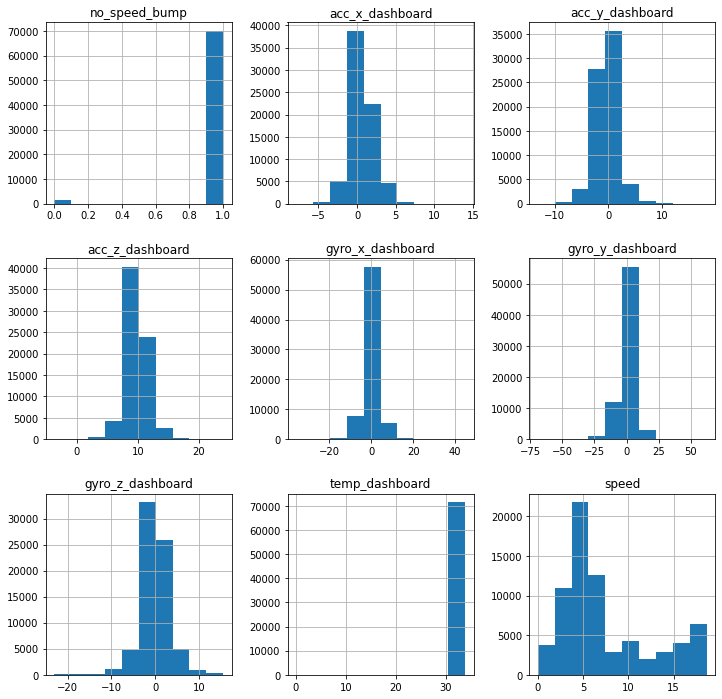

In [47]:
dados_v.hist(figsize=(12,12))

Esse gráfico nos mostra que em geral as acelereções, girocóptero e temperatura tem pouca variação, enquanto a velocidade apresenta uma grande variação, ou seja, o fator que possui grande infuência nesta é o tipo de rua pelo qual  veículo circula.

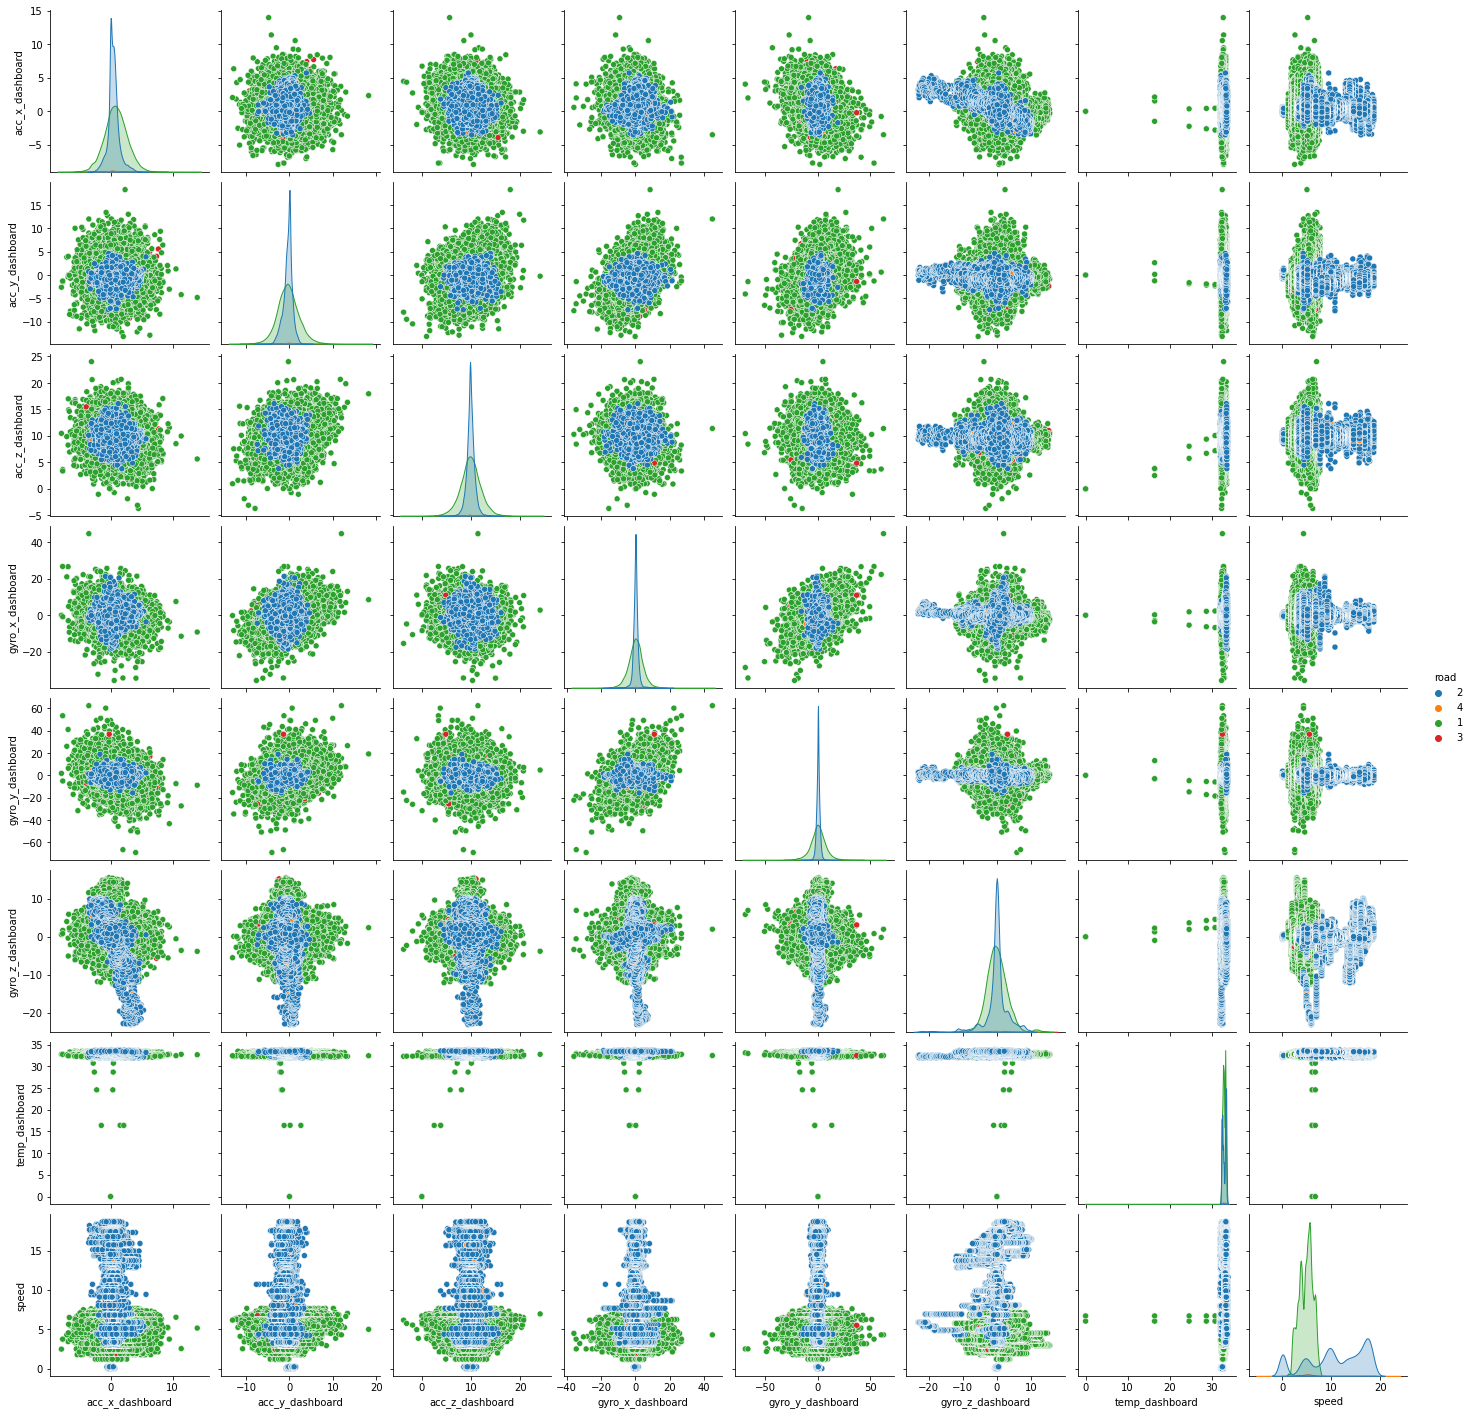

In [48]:
sns.pairplot(dados_v.drop(columns=['no_speed_bump']), hue='road')

Para este gráfico excluimos a coluna 'no_speed_bump' pois seu valor é apenas 1. <br/>
Podemos ver que em geral as ruas são pavimentadas e estas apresentam acelerações, girocóptero e velocidades escancaradamente maiores.

## 2.6. Construindo Machine Learning

Para desenvolver um ML para este caso, separamos em entrada e saída, para entrada eliminamos a coluna speed por ser a coluna de saída e as colunas no_speed_bump e temp_dashboard pois ambas não apresentavam relevância para o que o ml predissesse a saída esperada.
Primeiramente testamos o ML de regressâo linear,porém este apresentou métricas muito baixas, então tentamos o de Rede Neural o qual nos proporcionou métricas mais aceitáveis.

In [ ]:
x = dados_v.drop(columns=['speed', 'no_speed_bump', 'temp_dashboard'])
y = dados_v['speed']                

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

In [ ]:
#Regressão Linear
lr = LinearRegression()  
lr.fit(x_train,y_train)

y_predicoes = lr.predict(x_test) 

MAE = mean_absolute_error(y_true = y_test,     
                          y_pred = y_predicoes) 
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      
                         y_pred = y_predicoes)
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2 = r2_score(y_true = y_test,     
              y_pred = y_predicoes)
print('R2: ', R2)  

MAE:  4.216785328898007
MSE:  29.993321780379134
raiz MSE:  5.476615905865513
R2:  0.24282204286474784


In [ ]:
# Rede Neural
from sklearn.neural_network import MLPRegressor 
ml_perceptron = MLPRegressor(solver='lbfgs', 
                             tol=1e-5, 
                             max_iter=1500, 
                             random_state=42,
                             hidden_layer_sizes=(10,4), 
                             activation='relu') 

ml_perceptron.fit(x_train, y_train) 

y_predicoes = ml_perceptron.predict(x_test) 

R2 = r2_score(y_true = y_test,      
              y_pred = y_predicoes)
print('R2: ', R2) 

rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) 

MAE = mean_absolute_error(y_true = y_test,      
                          y_pred = y_predicoes)
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,     
                         y_pred = y_predicoes) 
print('MSE: ', MSE)


R2:  0.5035489416168099
ρ: 0.7096131650559121
MAE:  3.1667956180736634
MSE:  19.665411812347596


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
